## 2020707035 박시언 lab3-1

1. 로컬 아나콘다 환경에서 작업했기에 드라이브 마운트는 진행하지 않았습니다.
2. 라이브러리 설치는 가상환경에서 진행했습니다.
3. 스크래핑은 DATASCIENCE 서브 카테고리에서 진행했습니다.

과제의 요구사항은 다음과 같습니다.

가장 많은 업보트 수를 받은 게시물의 제목과 URL을 찾고 출력합니다.

가장 많은 댓글을 받은 게시물의 제목과 URL을 찾고 출력합니다.

모든 게시물에 대한 업보트와 댓글의 평균 값을 계산합니다.

업보트의 분포를 히스토그램으로 시각화합니다.

In [5]:
import praw 
import json

unsi_json = json.load(open('./unsi.json'))
unsi_json

{'client_id': 'gQ7icADqVdpj83A4Rykq-g',
 'client_secret': 'gQ78is3b7J6J80GhdMNRWNE9QftdDw',
 'user_agent': 'unsi',
 'redirect_uri': 'http://localhost:8080',
 'refresh_token': ''}

In [6]:
id = unsi_json['client_id']
secret_key = unsi_json['client_secret']
usr_name = unsi_json['user_agent']

In [8]:
reddit = praw.Reddit(client_id=id,
                     client_secret=secret_key,
                     user_agent=usr_name)

In [13]:
# get 50 hot posts from the DataScience subreddit
hot_posts = reddit.subreddit('DataScience').hot(limit=50)

In [14]:
# Create separate lists for each attribute
titles = []
authors = []
ups = []
num_comments = []
created_utc = []
urls = []

In [15]:
# Collect post information
for post in hot_posts:
    titles.append(post.title)               # Title
    authors.append(post.author)              # Author
    ups.append(post.ups)                     # Upvote count
    num_comments.append(post.num_comments)    # Comment count
    created_utc.append(post.created_utc)     # Submission date (UTC)
    urls.append(post.url)                    # Post URL

In [16]:
# Creating a DataFrame
import pandas as pd
posts_df = pd.DataFrame({
    'Title': titles,
    'Author': authors,
    'Ups': ups,
    'Num Comments': num_comments,
    'Created (UTC)': created_utc,
    'URL': urls
})

가장 많은 업보트 수를 받은 게시물:
제목: tanh me later
URL: https://i.redd.it/qzjthphseoud1.jpeg

가장 많은 댓글을 받은 게시물:
제목: What’s the right thing to say to my manager when they tell me that there will be no salary raise this year either?
URL: https://www.reddit.com/r/datascience/comments/1g4dsfp/whats_the_right_thing_to_say_to_my_manager_when/

모든 게시물에 대한 평균:
업보트 평균: 100.76
댓글 평균: 24.92


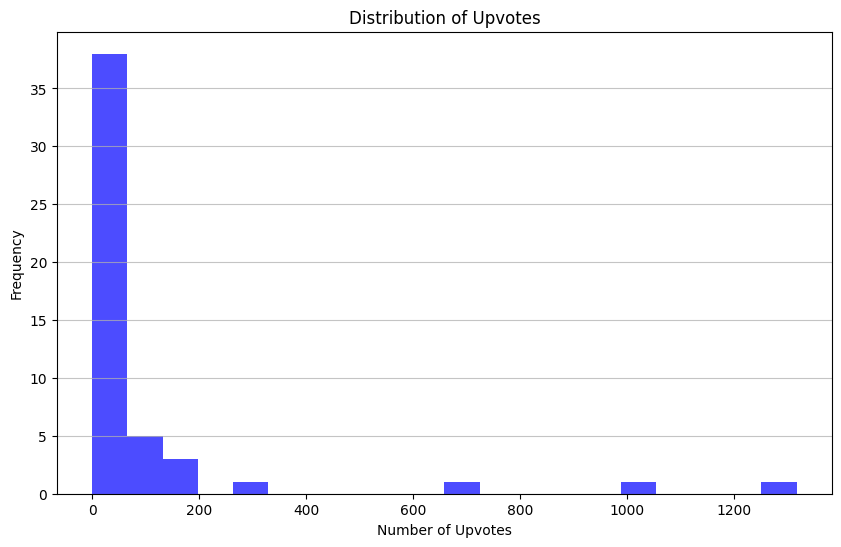

In [19]:
import matplotlib.pyplot as plt

# 1. Find the post with the most upvotes
top_upvote_post = posts_df.loc[posts_df['Ups'].idxmax()] # 가장 많은 업보트를 찾는 코드
print("가장 많은 업보트 수를 받은 게시물:") # 이 부분은 제목 출력하는 부분
print(f"제목: {top_upvote_post['Title']}") # 제목을 출력함
print(f"URL: {top_upvote_post['URL']}") # URL 출력

# 2. Find the post with the most comments
top_comment_post = posts_df.loc[posts_df['Num Comments'].idxmax()] # 댓글 많은 게시물 찾음
print("\n가장 많은 댓글을 받은 게시물:") # 이건 그냥 프린트
print(f"제목: {top_comment_post['Title']}") # 제목 출력
print(f"URL: {top_comment_post['URL']}") # URL도 출력

# 3. Calculate the average number of upvotes and comments for all posts
average_ups = posts_df['Ups'].mean() # 업보트 평균 계산
average_comments = posts_df['Num Comments'].mean() # 댓글 평균 계산
print("\n모든 게시물에 대한 평균:") # 평균 출력
print(f"업보트 평균: {average_ups:.2f}") # 소수점 두 자리까지 출력
print(f"댓글 평균: {average_comments:.2f}") # 댓글 평균도 마찬가지

# 4. Visualize the distribution of upvotes with a histogram
plt.figure(figsize=(10, 6)) # 사이즈 설정
plt.hist(posts_df['Ups'], bins=20, color='blue', alpha=0.7) # 히스토그램 그리기
plt.title('Distribution of Upvotes') # 제목
plt.xlabel('Number of Upvotes') # x축 레이블
plt.ylabel('Frequency') # y축 레이블
plt.grid(axis='y', alpha=0.75) # 그리드 그리기
plt.show() # 히스토그램 표시


## 2020707035 박시언 lab3-2

1. beautifulsoup와 req 라이브러리는 로컬에 이미 설치되어있습니다.

요구사항은 다음과 같습니다. 

가장 많은 업보트 수를 받은 게시물의 제목과 URL을 찾고 출력

가장 많은 댓글을 받은 게시물의 제목과 URL을 찾고 출력

모든 게시물에 대한 업보트와 댓글의 평균 값을 계산

업보트의 분포를 히스토그램으로 시각화

위의 모든 과정이 수행되었음을 확인할 수 있었습니다.

In [30]:
#라이브러리 가져오기
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 기본 URL 설정
base_url = 'http://books.toscrape.com/catalogue/page-{}.html' # 이거는 페이지 URL임

# 데이터 수집 함수 정의
def scrape_books_data(page_num):  # 함수 정의
    url = base_url.format(page_num)  # 페이지 번호 붙이기
    response = requests.get(url)  # 웹 페이지 요청해서 response 받음
    soup = BeautifulSoup(response.text, 'html.parser')  # HTML 파싱, soup이라는 이름으로 변수 저장

    books = []  # 여기에 책 정보 저장함

    # 책 정보를 포함하는 모든 카드 선택
    for article in soup.select('article.product_pod'):  # 'article.product_pod' 클래스 선택해서 반복 돌림
        title = article.h3.a['title']  # 책 제목 가져오기, h3 태그에서
        price = article.select_one('p.price_color').text  # 가격, price_color 클래스에서 가져오기
        stock = article.select_one('p.availability').text.strip()  # 재고 정보, strip으로 앞뒤 공백 제거
        rating = article.p['class'][1]  # 별점은 p 태그에 있는 클래스 두 번째 항목에서 가져옴

        # 책 정보를 딕셔너리로 저장
        books.append({  # 딕셔너리로 저장하고 리스트에 추가
            'title': title,  # 책 제목 저장
            'price': price,  # 가격 저장
            'stock': stock,  # 재고 상태 저장
            'rating': rating  # 별점 저장
        })

    return books  # 책 리스트 반환


In [31]:
# 모든 페이지에서 데이터 수집
all_books = []  # 모든 책 정보를 저장하는 리스트, 빈 리스트로 초기화

# 첫 페이지를 가져와서 총 페이지 수 결정
first_page_response = requests.get(base_url.format(1))  # 첫 번째 페이지 요청
first_page_soup = BeautifulSoup(first_page_response.text, 'html.parser')  # 첫 페이지 파싱

# 총 페이지 수 계산 (페이지 네비게이션에서 확인)
last_page = int(first_page_soup.find('li', class_='current').text.split()[-1])  # 'Page 1 of 50'에서 '50' 추출함

# 모든 페이지에서 책 정보 수집
for page_num in range(1, last_page + 1):  # 1부터 마지막 페이지까지 반복
    books_data = scrape_books_data(page_num)  # scrape_books_data 함수 호출해서 책 데이터 가져옴
    all_books.extend(books_data)  # 수집한 책 정보를 전체 리스트에 추가, extend 사용


In [32]:
# DataFrame 생성
books_df = pd.DataFrame(all_books)

# 전체 데이터 출력
print(books_df)

                                                 title    price     stock  \
0                                 A Light in the Attic  Â£51.77  In stock   
1                                   Tipping the Velvet  Â£53.74  In stock   
2                                           Soumission  Â£50.10  In stock   
3                                        Sharp Objects  Â£47.82  In stock   
4                Sapiens: A Brief History of Humankind  Â£54.23  In stock   
..                                                 ...      ...       ...   
995  Alice in Wonderland (Alice's Adventures in Won...  Â£55.53  In stock   
996   Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)  Â£57.06  In stock   
997  A Spy's Devotion (The Regency Spies of London #1)  Â£16.97  In stock   
998                1st to Die (Women's Murder Club #1)  Â£53.98  In stock   
999                 1,000 Places to See Before You Die  Â£26.08  In stock   

    rating  
0    Three  
1      One  
2      One  
3     Four  
4     Five

In [33]:
# 가격 컬럼을 숫자로 변환 (현재 문자열로 되어 있음)
# 문자열의 특수 문자 제거 후 변환
books_df['price'] = books_df['price'].replace({'£': '', 'Â': '', '': ''}, regex=True).str.strip()  # 공백 제거
books_df['price'] = pd.to_numeric(books_df['price'], errors='coerce')  # 변환 중 오류가 발생한 값은 NaN으로 처리

# 평균 가격 계산
average_price = books_df['price'].mean()
print(f"책들의 평균 가격: £{average_price:.2f}")


책들의 평균 가격: £35.07


In [34]:
# 재고가 있는 책 수 계산
in_stock_count = books_df[books_df['stock'].str.contains('In stock')].shape[0]
print(f"재고가 있는 책의 수: {in_stock_count}권")

재고가 있는 책의 수: 1000권


In [35]:
# 별점이 5점인 책들 필터링
five_star_books = books_df[books_df['rating'] == 'Five']

# 별점이 5점인 책 개수 계산
five_star_count = five_star_books.shape[0]

# 결과 출력
print("별점이 5점인 책들:")
print(five_star_books[['title', 'price', 'stock']])
print(f"\n총 개수: {five_star_count}권")

별점이 5점인 책들:
                                                 title  price     stock
4                Sapiens: A Brief History of Humankind  54.23  In stock
12                                         Set Me Free  17.46  In stock
13   Scott Pilgrim's Precious Little Life (Scott Pi...  52.29  In stock
14                           Rip it Up and Start Again  35.02  In stock
23                          Chase Me (Paris Nights #2)  25.27  In stock
..                                                 ...    ...       ...
985                    Deep Under (Walker Security #1)  47.09  In stock
989                                       Bright Lines  39.07  In stock
993  Bleach, Vol. 1: Strawberry and the Soul Reaper...  34.65  In stock
997  A Spy's Devotion (The Regency Spies of London #1)  16.97  In stock
999                 1,000 Places to See Before You Die  26.08  In stock

[196 rows x 3 columns]

총 개수: 196권


In [36]:
# 각 책의 URL과 제목 출력
print("각 책의 URL과 제목:")
for index, row in books_df.iterrows():
    book_url = base_url.replace('catalogue/page-{}.html', f"catalogue/{row['title'].replace(' ', '-')}.html")  # URL 구성
    print(f"제목: {row['title']}, URL: {book_url}")

각 책의 URL과 제목:
제목: A Light in the Attic, URL: http://books.toscrape.com/catalogue/A-Light-in-the-Attic.html
제목: Tipping the Velvet, URL: http://books.toscrape.com/catalogue/Tipping-the-Velvet.html
제목: Soumission, URL: http://books.toscrape.com/catalogue/Soumission.html
제목: Sharp Objects, URL: http://books.toscrape.com/catalogue/Sharp-Objects.html
제목: Sapiens: A Brief History of Humankind, URL: http://books.toscrape.com/catalogue/Sapiens:-A-Brief-History-of-Humankind.html
제목: The Requiem Red, URL: http://books.toscrape.com/catalogue/The-Requiem-Red.html
제목: The Dirty Little Secrets of Getting Your Dream Job, URL: http://books.toscrape.com/catalogue/The-Dirty-Little-Secrets-of-Getting-Your-Dream-Job.html
제목: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull, URL: http://books.toscrape.com/catalogue/The-Coming-Woman:-A-Novel-Based-on-the-Life-of-the-Infamous-Feminist,-Victoria-Woodhull.html
제목: The Boys in the Boat: Nine Americans and Their Epic Quest 